In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# Task 1b

In [6]:
def log(a):
    a = list(map(lambda x: 10**-9 if x < 0 else x, a))
    return list(map(math.log, a))

def model(c, t):
        A,B,C,D,E = c
        
        dAdt = -1.34*A*B - 8*10**3*A*C
        dBdt = -1.34*A*B - 1.6*10**9*C*B + E
        dCdt = 1.34*A*B - 1.6*10**9*C*B + 8*10**3*A*C - 2*4*10**7*C**2
        dDdt = 1.6*10**9*C*B + 4*10*7*C**2
        dEdt = 8*10**3*A*C - E
        
        return dAdt, dBdt, dCdt, dDdt, dEdt
    
c0 = [0.6*10**-1, 0.33*10**-6, 0.501*10**-10,0.3*10**-1, 0.24*10**-7]
t = np.linspace(0,200)

c = odeint(model, c0, t)
plt.plot(t, log(c[:,0]), label='A')
plt.plot(t, log(c[:,1]), label='B')
plt.plot(t, log(c[:,2]), label='C')
plt.plot(t, log(c[:,3]), label='D')
plt.plot(t, log(c[:,4]), label='E')
plt.title('The Belousov-Zhabotinski reaction')
plt.xlabel('time')
plt.ylabel('log concentration')
plt.legend()
plt.show()

# Task 2a

In [4]:
def model(c, t):
    A,B,C = c
    
    dAdt = 0.005*B - 0.05*A
    dBdt = 0.05*A - 0.705*B + 0.4*C
    dCdt = 0.7*B - 0.4*C
    
    return dAdt, dBdt, dCdt

c0 = [1.5, 3, 2]
t = np.linspace(0,100)

c = odeint(model, c0, t)

# copies to calculate difference later
A_copy = c[:,0].copy()
B_copy = c[:,1].copy()
C_copy = c[:,2].copy()

plt.plot(t[:25], c[:25,0], label='A')
plt.plot(t[:25], c[:25,1], label='B')
plt.plot(t[:25], c[:25,2], label='C')
plt.title('transient period')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

plt.plot(t[25:], c[25:,0], label='A')
plt.plot(t[25:], c[25:,1], label='B')
plt.plot(t[25:], c[25:,2], label='C')
plt.title('steady state period')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

# Task 2b

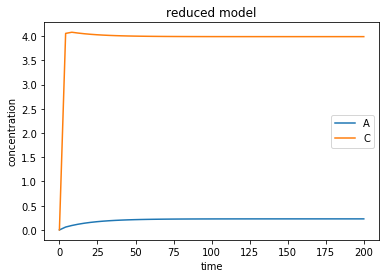

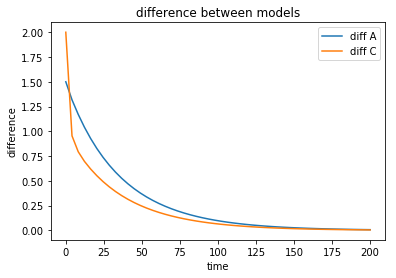

In [8]:
def reduced_model(c, t, B0):
    A,C = c
    
    dAdt = -0.05*A + 0.005*(B0-A-C)
    dCdt = 0.7*(B0-A-C) - 0.4*C
    return dAdt, dCdt


t = np.linspace(0,200)
c0 = [0,0]
B0 = 6.5



c = odeint(reduced_model, c0, t, (B0,))

diff_A = abs(A_copy - abs(c[:,0]))
diff_C = abs(C_copy - abs(c[:,1]))

plt.plot(t, c[:,0], label='A')
plt.plot(t, c[:,1], label='C')
plt.title('reduced model')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()

plt.plot(t, diff_A, label='diff A')
plt.plot(t, diff_C, label='diff C')
plt.title('difference between models')
plt.xlabel('time')
plt.ylabel('difference')
plt.legend()
plt.show()